In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
lpiDf = pd.read_excel(r"final_LPI_from_2007_to_2023_0.xlsx")
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')

In [31]:
lpiDf. head(16)

,Economy,Year,LPI Score,LPI Grouped Rank,Customs Score,Customs Grouped Rank,Infrastructure Score,Infrastructure Grouped Rank,International Shipments Score,International Shipments Grouped Rank,Logistics Competence and Quality Score,Logistics Competence and Quality Grouped Rank,Timeliness Score,Timeliness Grouped Rank,Tracking and Tracing Score,Tracking and Tracing Grouped Rank
0,Canada,2023,4.000000,7.0,4.000000,4,4.300000,3,3.600000,14,4.200000,3,4.100000,10,4.100000,11
1,Canada,2018,3.700000,20.0,3.603930,18,3.750496,21,3.381662,30,3.898040,14,3.960503,22,3.809804,21
2,Canada,2016,3.900000,14.0,3.952071,6,4.141614,9,3.558343,29,3.897193,15,4.009393,25,4.100897,9
3,Canada,2014,3.900000,12.0,3.608017,20,4.054256,10,3.464442,23,3.940668,10,4.177313,11,3.968199,8
4,Canada,2012,3.846479,14.0,3.578957,17,3.989496,12,3.546580,18,3.845956,13,4.305873,3,3.856377,14
5,Canada,2010,3.855811,14.0,3.706367,13,4.027057,11,3.243744,32,3.993496,8,4.005055,15,4.407830,5
6,Canada,2007,3.921926,NaN,3.818180,9,3.948980,12,3.778950,8,3.853930,12,4.188240,13,3.977780,11
7,United States,2023,3.800000,17.0,3.700000,14,3.900000,16,3.400000,26,3.900000,14,3.800000,25,4.200000,3
8,United States,2018,3.885129,14.0,3.775142,10,4.045132,7,3.506325,23,3.874253,16,4.083623,19,4.091751,6
9,United States,2016,4.000000,10.0,3.752486,16,4.152011,8,3.650306,19,4.014226,8,4.250527,11,4.200025,5


In [11]:
# define X (features) and response/target (y)
   
X=lpiDf.drop('Tracking and Tracing Score', axis=1)    # or  X=df.iloc[:,0:6]   

y=lpiDf['Tracking and Tracing Score']

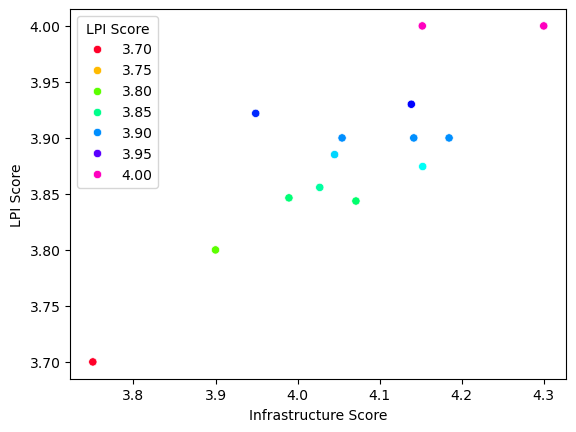

In [21]:
# Scatter plot to assess the relationship between OEE and Quality of Products

sns.scatterplot(data=lpiDf, x="Infrastructure Score", y="LPI Score", hue="LPI Score", palette='gist_rainbow');

In [35]:
!pip install pandas statsmodels scikit-learn


In [217]:
# Infra / Tracking and Tracing with LPI Score
import pandas as pd

data = {
    'year': [2023, 2018, 2016, 2014, 2012, 2010, 2007],
    'infrastructure score': [4.3, 3.8, 4.1, 4.1, 4.0,4.0, 3.9],
    'tracking_tracing': [4.1, 3.8, 4.1, 4.0, 3.9, 4.4, 4.0],
    'lpi score': [4.0, 3.7, 3.9, 3.9, 3.8, 3.9, 3.9]# 應變數
}
df = pd.DataFrame(data)


In [219]:
import statsmodels.api as sm

X = df[['infrastructure score', 'tracking_tracing',]]
y = df['lpi score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              lpi score   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     7.847
Date:                Wed, 30 Oct 2024   Prob (F-statistic):             0.0413
Time:                        11:05:02   Log-Likelihood:                 12.654
No. Observations:                   7   AIC:                            -19.31
Df Residuals:                       4   BIC:                            -19.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4979 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [221]:
# Prediction

from sklearn.linear_model import LinearRegression


X = df[['infrastructure score', 'tracking_tracing']]
y = df['lpi score']


model = LinearRegression().fit(X, y)


print("intercept:", model.intercept_)
print("coef:", model.coef_)


predictions = model.predict(X)
print("predictions:", predictions)


intercept: 1.4978873239436625
coef: [0.40643863 0.18209256]
predictions: [3.99215292 3.73430584 3.91086519 3.89265594 3.83380282 3.92484909
 3.81136821]


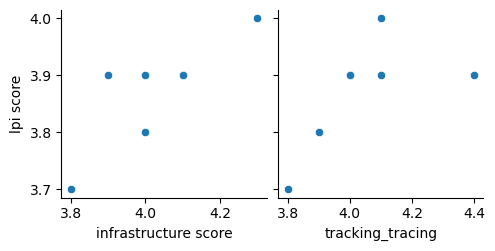

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# scatter chart
sns.pairplot(df, x_vars=['infrastructure score', 'tracking_tracing'], 
             y_vars='lpi score', kind='scatter')
plt.show()


In [225]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = {
   'infrastructure score': [4.3, 3.8, 4.1, 4.1, 4.0,4.0, 3.9],
   'lpi score': [4.0, 3.7, 3.9, 3.9, 3.8, 3.9, 3.9]  # 應變量
}
df = pd.DataFrame(data)


X = df[['infrastructure score']]
y = df['lpi score']


In [227]:

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


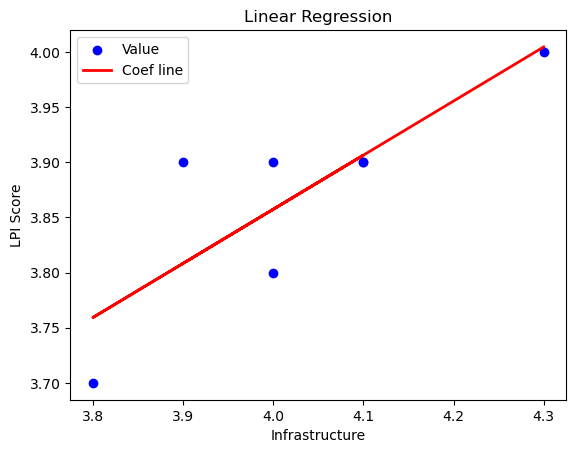

In [229]:

plt.scatter(X, y, color='blue', label='Value')


plt.plot(X, y_pred, color='red', linewidth=2, label='Coef line')


plt.xlabel('Infrastructure')
plt.ylabel('LPI Score')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = {
    'tracking_tracing': [4.1, 3.8, 4.1, 4.0, 3.9, 4.4, 4.0],
   'lpi score': [4.0, 3.7, 3.9, 3.9, 3.8, 3.9, 3.9]  # 應變量
}
df = pd.DataFrame(data)


X = df[['tracking_tracing']]
y = df['lpi score']

In [233]:

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

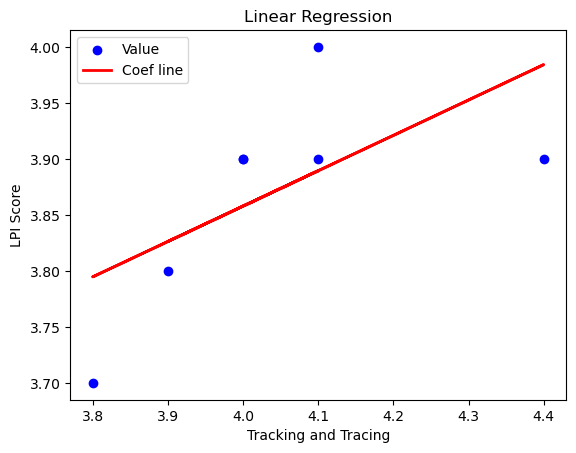

In [235]:

plt.scatter(X, y, color='blue', label='Value')


plt.plot(X, y_pred, color='red', linewidth=2, label='Coef line')


plt.xlabel('Tracking and Tracing')
plt.ylabel('LPI Score')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [239]:
#ARIMA Model
import pandas as pd


data = {
    'year': [2023, 2018, 2016, 2014, 2012, 2010, 2007],
    'lpi score': [4.0, 3.7, 3.9, 3.9, 3.8, 3.9, 3.9]
}
df = pd.DataFrame(data)
df.set_index('year', inplace=True)  # 設定年份為索引


In [241]:
from statsmodels.tsa.stattools import adfuller

# ADF Testing
result = adfuller(df['lpi score'])
print('ADF testing:', result[0])
print('p_value:', result[1])


ADF testing: -4.698092386498188
p_value: 8.48498958995679e-05


In [166]:
!pip install pmdarima
from pmdarima import auto_arima

model = auto_arima(df['lpi score'], seasonal=False, trace=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2.288, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40.819, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2.170, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6.991, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12.685, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11.800, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.384 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observa

In [167]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['lpi score'], order=(2, 0, 0))
arima_result = model.fit()


print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:              lpi score   No. Observations:                    7
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  11.657
Date:                Wed, 30 Oct 2024   AIC                            -15.313
Time:                        11:02:16   BIC                            -15.529
Sample:                             0   HQIC                           -17.987
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8590      0.009    430.961      0.000       3.841       3.877
ar.L1         -1.1286      0.492     -2.296      0.022      -2.092      -0.165
ar.L2         -0.8682      0.192     -4.518      0.0

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [168]:

forecast = arima_result.forecast(steps=3)
print("future 3 yeays:")
print(forecast)


future 3 yeays:
7    3.777068
8    3.915806
9    3.865965
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


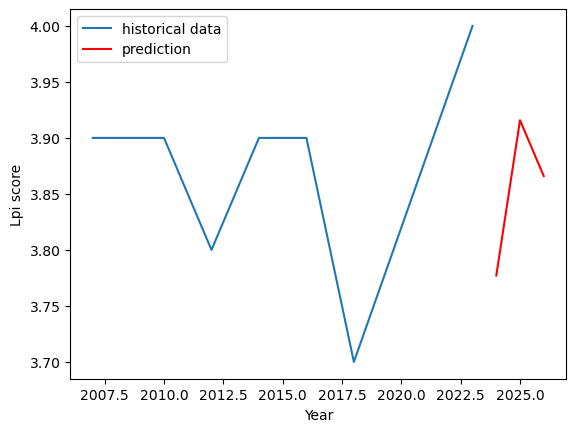

In [169]:
import matplotlib.pyplot as plt


plt.plot(df.index, df['lpi score'], label='historical data')


forecast_years = [2024, 2025, 2026]
plt.plot(forecast_years, forecast, label='prediction', color='red')

plt.xlabel('Year')
plt.ylabel('Lpi score')
plt.legend()
plt.show()


In [170]:
# VAR Model

import pandas as pd

data = {
    'year': [2023, 2018, 2016, 2014, 2012, 2010, 2007],
    'infrastructure score': [4.3, 3.8, 4.1, 4.1, 4.0,4.0, 3.9],
    'tracking_tracing': [4.1, 3.8, 4.1, 4.0, 3.9, 4.4, 4.0],
    'lpi score': [4.0, 3.7, 3.9, 3.9, 3.8, 3.9, 3.9]
}
df = pd.DataFrame(data)
df.set_index('year', inplace=True)  # Put Year as index


In [174]:
from statsmodels.tsa.api import VAR


model = VAR(df)
var_result = model.fit(maxlags=2) 


print(var_result.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 30, Oct, 2024
Time:                     11:02:16
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -193.686
Nobs:                     5.00000    HQIC:                  -196.448
Log likelihood:           479.830    FPE:               -1.91459e-85
AIC:                     -192.046    Det(Omega_mle):    -1.38497e-86
--------------------------------------------------------------------
Results for equation infrastructure score
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           3.017512              NAN              NAN             NAN
L1.infrastructure score        -2.770240              NAN              NAN             NAN
L1.tr

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/vector_ar/var_model.py:1558: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


In [178]:

forecast = var_result.forecast(df.values[-var_result.k_ar:], steps=3)
forecast_df = pd.DataFrame(forecast, columns=df.columns)
forecast_df.index = [2024, 2025, 2026]
print(forecast_df)


      infrastructure score  tracking_tracing  lpi score
2024              4.240640          0.858970   3.275867
2025              4.758348          6.511481   3.847736
2026              1.602102         25.063853   7.899671


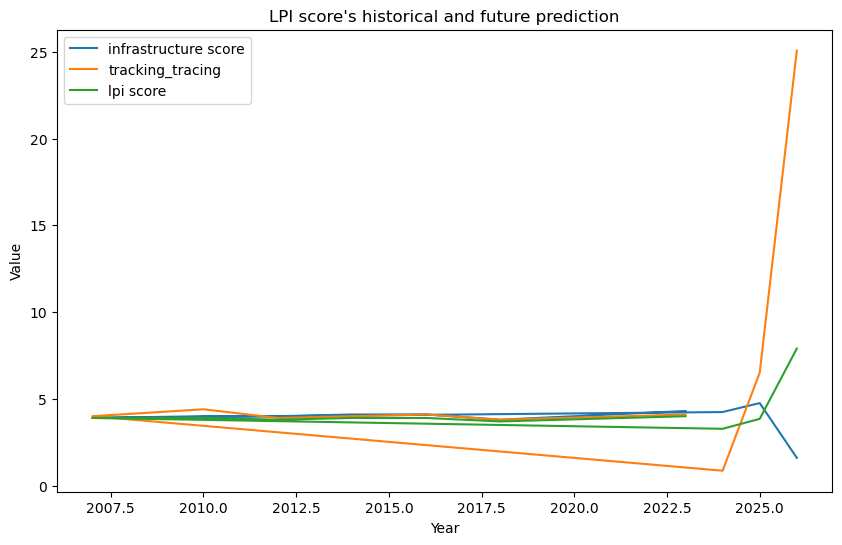

In [180]:
import matplotlib.pyplot as plt


combined_df = pd.concat([df, forecast_df])


combined_df.plot(figsize=(10, 6))
plt.title("LPI score's historical and future prediction")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = {
    'year': [2023, 2018, 2016, 2014, 2012, 2010, 2007],
    'infrastructure score': [4.3, 3.8, 4.1, 4.1, 4.0,4.0, 3.9],
    'tracking_tracing': [4.1, 3.8, 4.1, 4.0, 3.9, 4.4, 4.0],
    'lpi score': [4.0, 3.7, 3.9, 3.9, 3.8, 3.9, 3.9]  # 目標變量
}
df = pd.DataFrame(data)


In [184]:

X = df[['infrastructure score', 'tracking_tracing']]
y = df['lpi score']


In [186]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X, y)


predictions = model.predict(X)


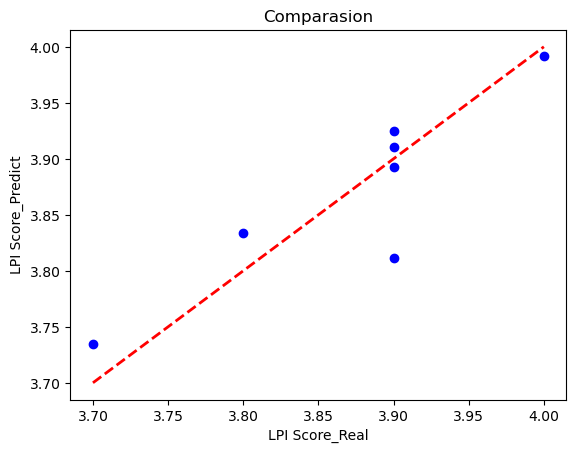

In [188]:

plt.scatter(y, predictions, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # y=x 參考線
plt.xlabel('LPI Score_Real')
plt.ylabel('LPI Score_Predict')
plt.title('Comparasion')
plt.show()


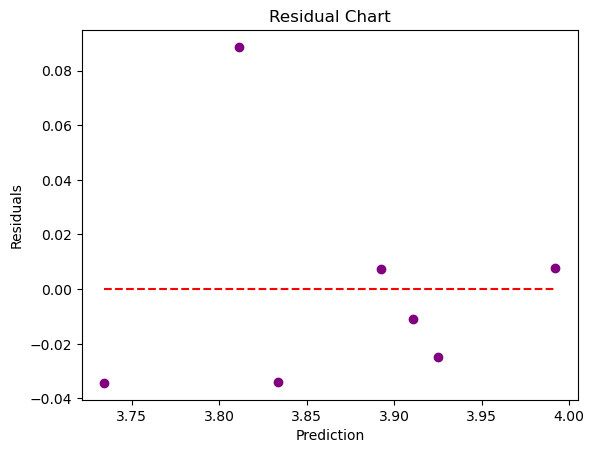

In [190]:

residuals = y - predictions


plt.scatter(predictions, residuals, color='purple')
plt.hlines(0, min(predictions), max(predictions), colors='red', linestyles='dashed')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.title('Residual Chart')
plt.show()


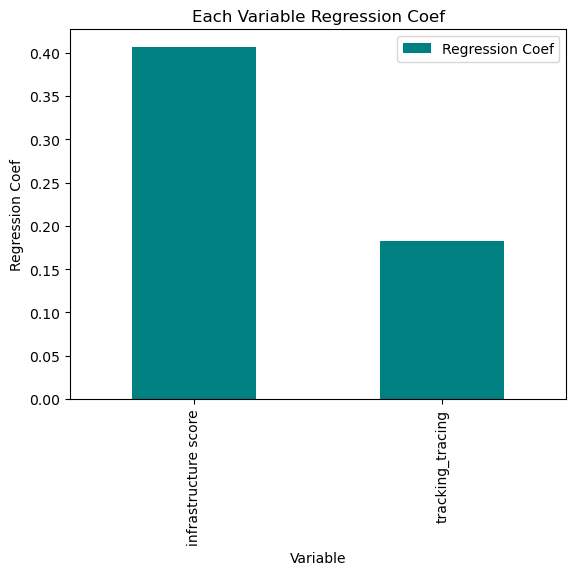

In [192]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Regression Coef'])
coefficients.plot(kind='bar', color='teal')
plt.title('Each Variable Regression Coef')
plt.xlabel('Variable')
plt.ylabel('Regression Coef')
plt.show()


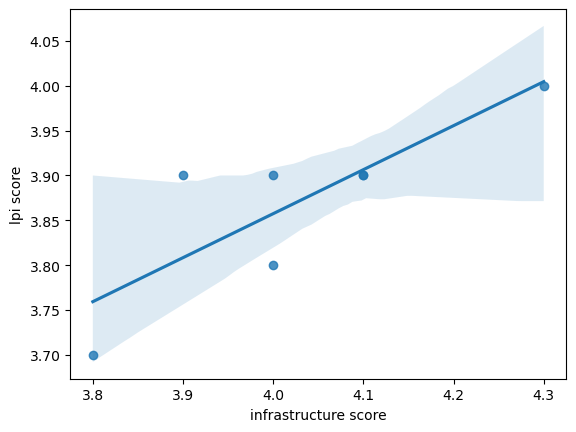

In [194]:
sns.regplot(x="infrastructure score", y="lpi score", data=df);

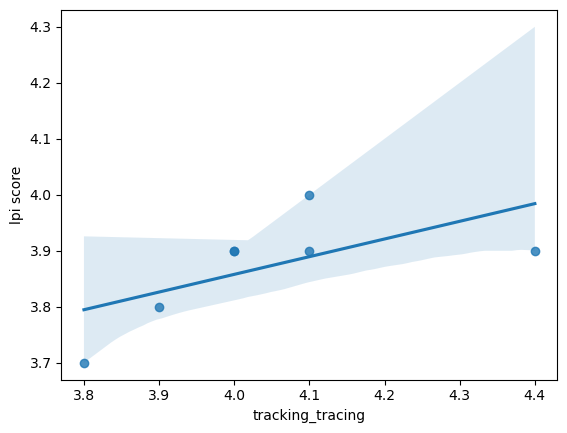

In [196]:
sns.regplot(x="tracking_tracing", y="lpi score", data=df);

In [198]:
X=lpiDf.drop('Infrastructure Score', axis=1)    # or  X=df.iloc[:,0:6]   

y=lpiDf['Tracking and Tracing Score']

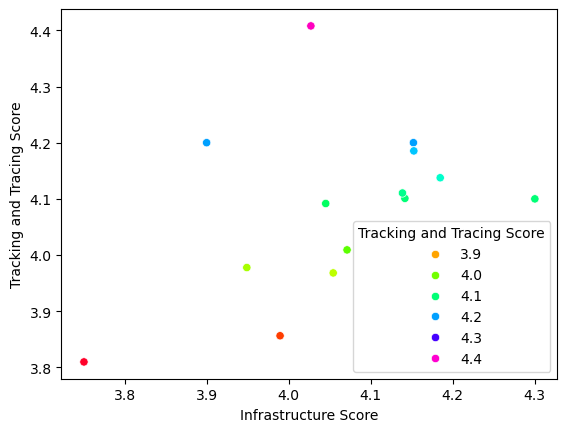

In [200]:
# Scatter plot to assess the relationship between Infra and Tracking_tracing

sns.scatterplot(data=lpiDf, x="Infrastructure Score", y="Tracking and Tracing Score", hue="Tracking and Tracing Score", palette='gist_rainbow');

In [202]:
!pip install pandas statsmodels scikit-learn

In [203]:
# Infra / Tracking and Tracing
import pandas as pd

data = {
    'year': [2023, 2018, 2016, 2014, 2012, 2010, 2007],
    'infrastructure score': [4.3, 3.8, 4.1, 4.1, 4.0,4.0, 3.9],
    'tracking_tracing': [4.1, 3.8, 4.1, 4.0, 3.9, 4.4, 4.0],
}
df = pd.DataFrame(data)


In [204]:
import statsmodels.api as sm

X = df['infrastructure score']
y = df['tracking_tracing']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       tracking_tracing   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.8982
Date:                Wed, 30 Oct 2024   Prob (F-statistic):              0.387
Time:                        11:02:22   Log-Likelihood:                 2.8016
No. Observations:                   7   AIC:                            -1.603
Df Residuals:                       5   BIC:                            -1.711
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1778 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dataset
data = {
   'infrastructure score': [4.3, 3.8, 4.1, 4.1, 4.0,4.0, 3.9],
   'tracking_tracing': [4.1, 3.8, 4.1, 4.0, 3.9, 4.4, 4.0], 
}
df = pd.DataFrame(data)

# Define X and y
X = df[['infrastructure score']]
y = df['tracking_tracing']


In [206]:
# Build the training and model
model = LinearRegression()
model.fit(X, y)

# Prediction proceed
y_pred = model.predict(X)

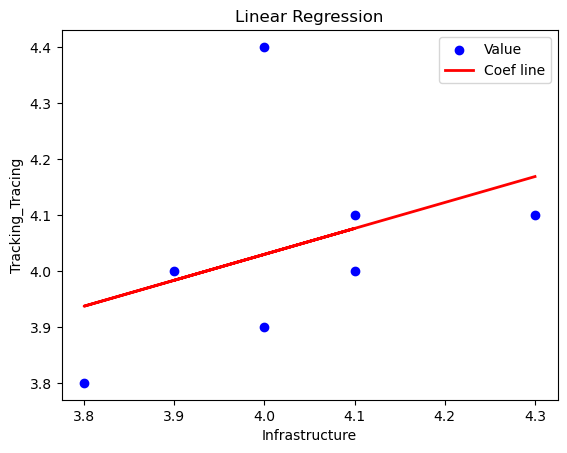

In [207]:
# 散佈圖顯示數據點
plt.scatter(X, y, color='blue', label='Value')

# 繪製回歸線
plt.plot(X, y_pred, color='red', linewidth=2, label='Coef line')

# 添加標籤和標題
plt.xlabel('Infrastructure')
plt.ylabel('Tracking_Tracing')
plt.title('Linear Regression')
plt.legend()
plt.show()